In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [48]:
cacao = pd.read_csv('cacao_flavors.xls')

In [7]:
display(cacao.head(10))
cacao.info() 

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,7,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,8,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,9,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,10,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
Bar id                              1795 non-null int64
Company 
(Maker-if known)           1795 non-null object
Specific Bean Origin
or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review
Date                         1795 non-null int64
Cocoa
Percent                       1795 non-null object
Company
Location                    1795 non-null object
Rating                              1795 non-null float64
Bean
Type                           1794 non-null object
Broad Bean
Origin                   1794 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


In [9]:
cacao.columns

Index(['Bar id', 'Company \n(Maker-if known)',
       'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate',
       'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType',
       'Broad Bean\nOrigin'],
      dtype='object')

In [49]:
cacao.columns = ['bar_id', 'company', 'specific_origin', 'ref', 'review_date',
       'cocoa_percent', 'company_location', 'rating', 'bean_type', 'broad_origin']

1795


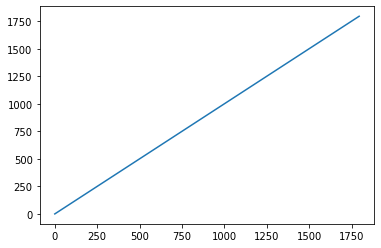

In [13]:
print(cacao.bar_id.nunique())
plt.plot(cacao.bar_id)

In [14]:
cacao.drop(['bar_id'], inplace = True, axis = 1)

In [15]:
pd.DataFrame(cacao.company.value_counts())

,company
,99
Soma,45
Fresco,26
Bonnat,26
Pralus,25
...,...
Chuao Chocolatier,1
Chuao Chocolatier (Pralus),1
Hachez,1
Breeze Mill,1


In [18]:
cacao.company.nunique()

408

In [26]:
cacao.company = cacao.company.apply(lambda x: None if x.strip() == '' else x)

In [29]:
display(pd.DataFrame(cacao.company.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.company.value_counts()>10).sum())
cacao.loc[:, ['company']].info()

,company
Soma,45
Bonnat,26
Fresco,26
Pralus,25
Domori,22
...,...
Chchukululu (Tulicorp),1
Monarque,1
Chocablog,1
Sibu Sura,1


Значений, встретившихся в столбце более 10 раз: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
company    1696 non-null object
dtypes: object(1)
memory usage: 14.1+ KB


In [56]:
cacao.specific_origin = cacao.specific_origin.apply(lambda x: None if x.strip() == '' else x)

In [59]:
display(pd.DataFrame(cacao.specific_origin.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.specific_origin.value_counts()>10).sum())
cacao.loc[:, ['specific_origin']].info()

,specific_origin
Madagascar,55
Peru,44
Ecuador,39
Dominican Republic,33
Venezuela,21
...,...
Peruvian,1
"Tien Giang, 2015, batch 10-2-16",1
El Ceibo Coop,1
Guadeloupe,1


Значений, встретившихся в столбце более 10 раз: 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
specific_origin    1737 non-null object
dtypes: object(1)
memory usage: 14.1+ KB


count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

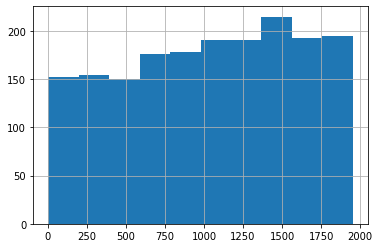

In [60]:
cacao.ref.hist()
cacao.ref.describe()


count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

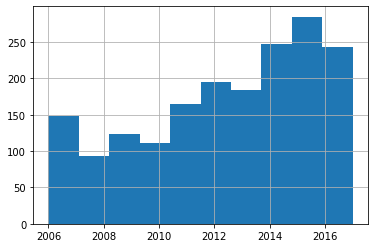

In [61]:
cacao.review_date.hist()
cacao.review_date.describe()

In [62]:
cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%', '')))

count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

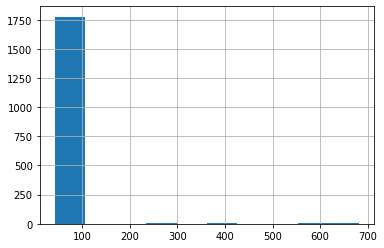

In [63]:
cacao.cocoa_percent.hist()
cacao.cocoa_percent.describe()

In [67]:
median = cacao.cocoa_percent.median()
perc25 = cacao.cocoa_percent.quantile(0.25)
perc75 = cacao.cocoa_percent.quantile(0.75)
IQR = perc75 - perc25

25-й перцентиль: 70.0, 75-й перцентиль: 75.0, IQR: 5.0,  Границы выбросов: [62.5, 82.5].


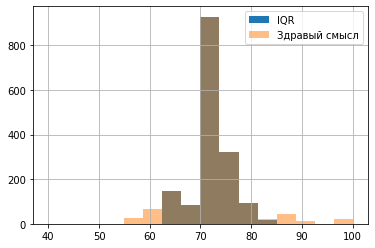

In [68]:
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

cacao.cocoa_percent.loc[cacao.cocoa_percent.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 16
                                                                                              , range = (40, 100), 
                                                                                             label = 'IQR')
cacao.cocoa_percent.loc[cacao.cocoa_percent <= 100].hist(alpha = 0.5, bins = 16, range = (40, 100),
                                                        label = 'Здравый смысл')
plt.legend();

25-й перцентиль: 3.0, 75-й перцентиль: 3.5, IQR: 0.5,  Границы выбросов: [2.25, 4.25].


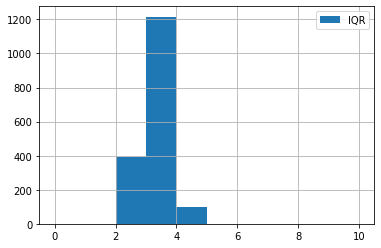

In [69]:
median = cacao.rating.median()
IQR = cacao.rating.quantile(0.75) - cacao.rating.quantile(0.25)
perc25 = cacao.rating.quantile(0.25)
perc75 = cacao.rating.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
cacao.rating.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();

In [70]:
cacao = cacao.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [72]:
cacao

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
1,2,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670.0,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela
...,...,...,...,...,...,...,...,...,...,...
1790,1791,Zotter,Peru,647,2011,70.0,Austria,3.75,,Peru
1791,1792,Zotter,Congo,749,2011,65.0,Austria,3.00,Forastero,Congo
1792,1793,Zotter,Kerala State,749,2011,65.0,Austria,3.50,Forastero,India
1793,1794,Zotter,Kerala State,781,2011,62.0,Austria,3.25,,India


In [73]:
cacao.bean_type = cacao.bean_type.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [74]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,405
Criollo,149
Forastero,81
Forastero (Nacional),50
"Criollo, Trinitario",38
Blend,36
Forastero (Arriba),30
Criollo (Porcelana),10
"Trinitario, Criollo",9
Forastero (Parazinho),8


Значений, встретившихся в столбце более 10 раз: 7
Уникальных значений: 41
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 1 to 1794
Data columns (total 1 columns):
bean_type    868 non-null object
dtypes: object(1)
memory usage: 26.7+ KB


In [75]:
cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [76]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,409
Forastero,179
Criollo,167
"Criollo, Trinitario",38
Blend,36
"Trinitario, Criollo",9
Nacional,5
Matina,3
Beniano,3
EET,3


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 21
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 1 to 1794
Data columns (total 1 columns):
bean_type    867 non-null object
dtypes: object(1)
memory usage: 26.7+ KB


In [78]:
cacao.broad_origin.unique()

array(['Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama', 'Madagascar',
       'Brazil', 'Ecuador', 'Colombia', 'Burma', 'Papua New Guinea',
       'Bolivia', 'Fiji', 'Mexico', 'Indonesia', 'Trinidad', 'Vietnam',
       'Nicaragua', 'Tanzania', 'Dominican Republic', 'Ghana', 'Belize',
       '\xa0', 'Jamaica', 'Honduras', 'Costa Rica', 'Guatemala', 'Haiti',
       'Congo', 'Philippines', 'Domincan Republic', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Grenada',
       'Sao Tome', 'Uganda', 'Martinique', 'Sao Tome & Principe',
       'Vanuatu', 'Australia', 'Liberia', 'Ecuador, Costa Rica',
       'West Africa', 'Hawaii', 'St. Lucia', 'Cost Rica, Ven',
       'Peru, Madagascar', 'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Trinidad-Tobago',
       'Peru, Ecuador, Venezuela', 'Venezuela, D

In [99]:
cacao.broad_origin = cacao.broad_origin.apply(lambda x: None if x == '' else x)

In [101]:
cacao.broad_origin = cacao.broad_origin.apply(lambda x: None if pd.isnull(x) else x)

In [87]:
(cacao.broad_origin.value_counts()>10).sum()

26

In [102]:
(cacao.broad_origin.value_counts() > 10).sum()

26

In [103]:
cacao.broad_origin.value_counts().head(30)

Venezuela             204
Ecuador               180
Peru                  159
Madagascar            142
Dominican Republic    135
                       59
Nicaragua              59
Brazil                 57
Bolivia                53
Belize                 49
Papua New Guinea       42
Colombia               39
Vietnam                38
Costa Rica             37
Trinidad               32
Tanzania               31
Ghana                  31
Mexico                 28
Guatemala              27
Hawaii                 26
Domincan Republic      24
Jamaica                18
Grenada                17
Indonesia              16
Honduras               15
Cuba                   11
Congo                  10
Sao Tome                9
Haiti                   9
Fiji                    8
Name: broad_origin, dtype: int64

In [104]:
def fix_countries(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
        
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
        
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
        
    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    return x

In [105]:
cacao.broad_origin = cacao.broad_origin.apply(fix_countries).sort_values()

In [106]:
display(pd.DataFrame(cacao.broad_origin.value_counts()))
print('Значений, упомянутых более 10 раз:', (cacao.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.broad_origin.nunique())
cacao.loc[:, ['broad_origin']].info()

,broad_origin
Venezuela,204
Ecuador,180
Peru,160
Madagascar,142
DominicanRepublic,135
...,...
"Venezuela,Trinidad,Madagascar",1
"Venezuela,Ecuador,Peru,Nicaragua",1
"SouthAmerica,Africa",1
"DomincanRepublic,Ecuador,Peru",1


Значений, упомянутых более 10 раз: 26
Уникальных значений: 94
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 1 to 1794
Data columns (total 1 columns):
broad_origin    1707 non-null object
dtypes: object(1)
memory usage: 26.7+ KB


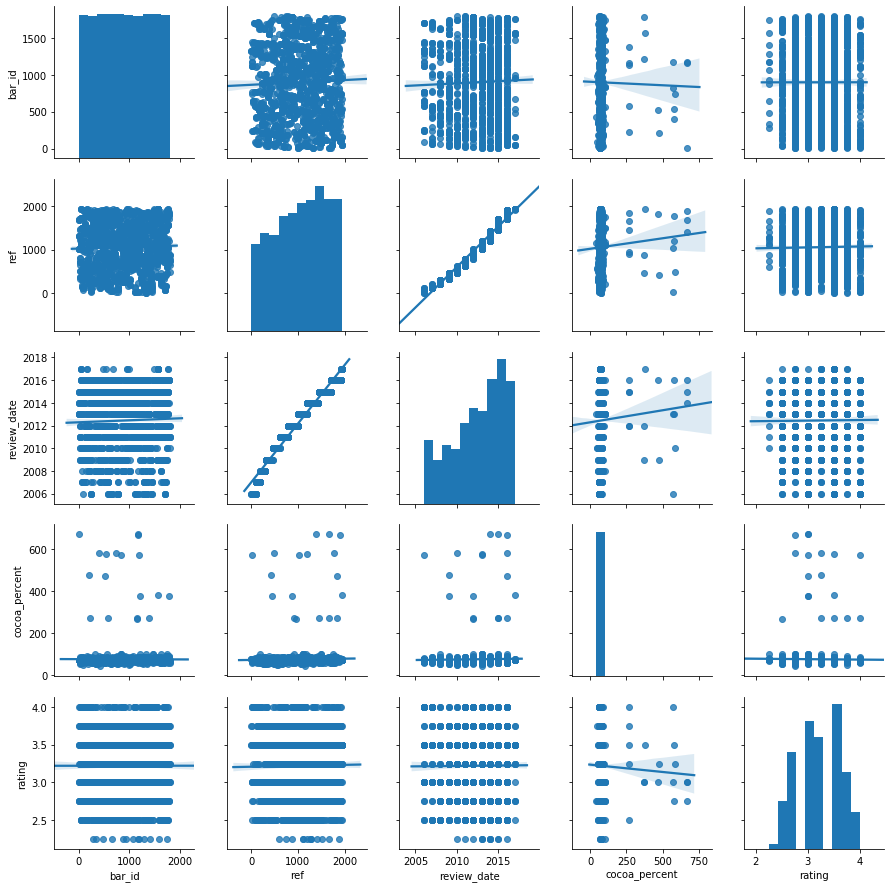

In [107]:
sns.pairplot(cacao, kind = 'reg')

In [108]:
cacao.corr()

,bar_id,ref,review_date,cocoa_percent,rating
bar_id,1.000000,0.033938,0.031889,-0.007914,0.000440
ref,0.033938,1.000000,0.984927,0.038464,0.016306
review_date,0.031889,0.984927,1.000000,0.031937,0.007524
cocoa_percent,-0.007914,0.038464,0.031937,1.000000,-0.020138
rating,0.000440,0.016306,0.007524,-0.020138,1.000000


In [109]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='rating', 
                data=cacao.loc[cacao.loc[:, column].isin(cacao.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

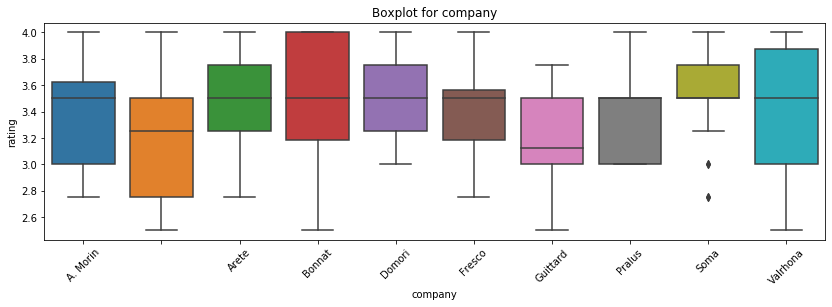

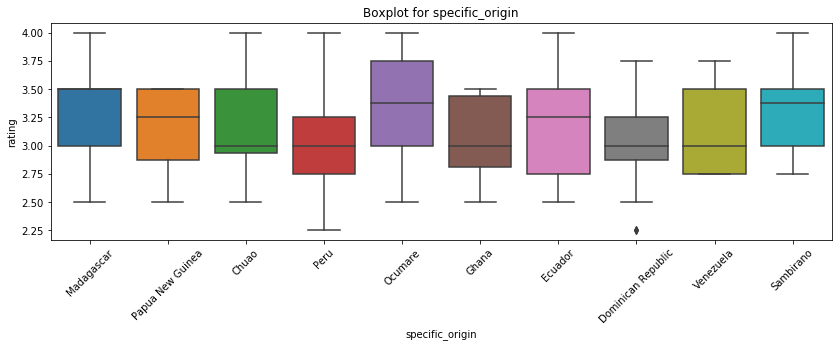

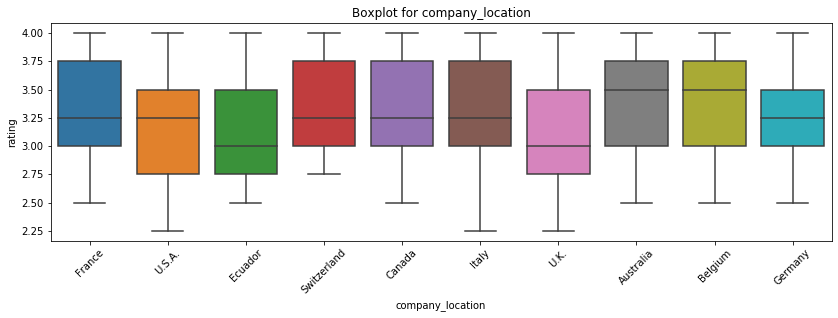

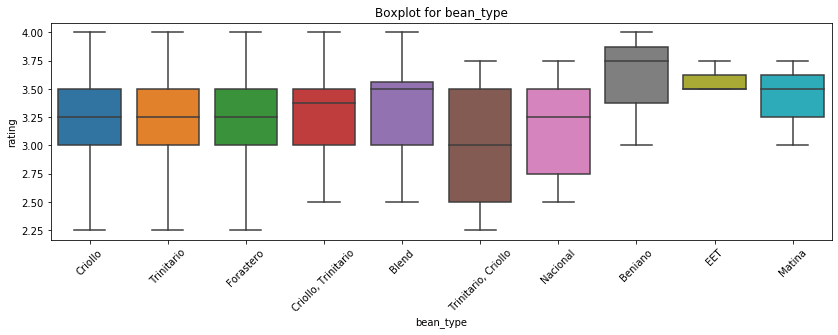

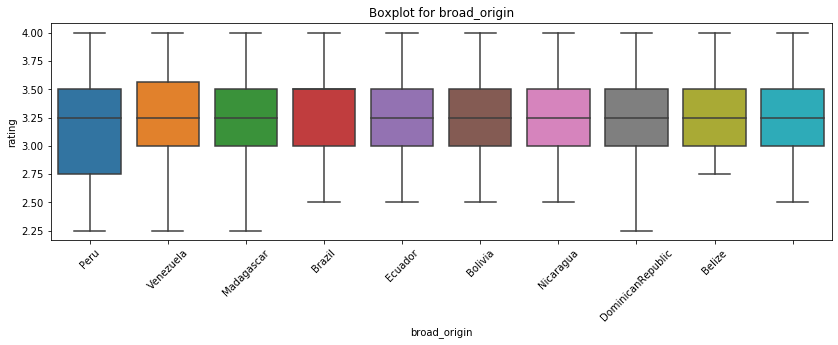

In [125]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_boxplot(col)

In [134]:
def get_stat_dif(column):
    cols = cacao.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(cacao.loc[cacao.loc[:, column] == comb[0], 'rating'], 
                        cacao.loc[cacao.loc[:, column] == comb[1], 'rating']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [135]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки company
Найдены статистически значимые различия для колонки specific_origin
Найдены статистически значимые различия для колонки company_location


# Проект 2. Разведывательный анализ данных

## Основные цели и задачи проекта
Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.  
  
Задача проекта — на основе имеющихся данных подготовить датасет, который будем использовать для обучение ML модели предсказывающей результаты экзамена по математике

## Краткая информация о данных
- Датасет содержит 30 столбцов и 395 строк
- Полностью заполнены только 3 столбца, в остальных есть пропуски

Наименования столбцов:
--
**school** — аббревиатура школы, в которой учится ученик  
**sex** — пол ученика ('F' - женский, 'M' - мужской)  
**age** — возраст ученика (от 15 до 22)  
**address** — тип адреса ученика ('U' - городской, 'R' - за городом)  
**famsize** — размер семьи('LE3' <= 3, 'GT3' >3)  
**Pstatus** — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)  
**Medu** — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)  
**Fedu** — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)  
**Mjob** — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)  
**Fjob** — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)  
**reason** — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)  
**guardian** — опекун ('mother' - мать, 'father' - отец, 'other' - другое)  
**traveltime** — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)  
**studytime** — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)  
**failures** — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)  
**schoolsup** — дополнительная образовательная поддержка (yes или no)  
**famsup** — семейная образовательная поддержка (yes или no)  
**paid** — дополнительные платные занятия по математике (yes или no)  
**activities** — дополнительные внеучебные занятия (yes или no)  
**nursery** — посещал детский сад (yes или no)  
**higher** — хочет получить высшее образование (yes или no)  
**internet** — наличие интернета дома (yes или no)  
**romantic** — в романтических отношениях (yes или no)  
**famrel** — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)  
**freetime** — свободное время после школы (от 1 - очень мало до 5 - очень мого)  
**goout** — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)  
**health** — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)  
**absences** — количество пропущенных занятий  
**score** — баллы по госэкзамену по математике  

## Этапы работы над проектом
- Загрузка датасета и первичный осмотр каждого столбца. 
- Исправление ошибочных значений
- Проверка распределения числовых признаков
- Корреляционный анализ
- Удаление ненужных столбцов и строк
- Заполнение пропусков
- Выводы

## Выводы
- Был обнаружен столбец **studytime, granular** которого не было в описании. Но так как была корреляция -100%, то мы смело его удалили
- Явной корреляции не заметили  как по числовым признакам, так и по номинативным
- Были обнаружены очевидные ошибки когда вместо 4 ставили 40 (хотя здравый смысл говорит о том, что такого быть не может) и т.п. Их мало. Похоже на человеческий фактор.
- Выбросы были в столбцах **age** и **absences**
    - В **age** оставили, т.к. был только один выброс и он входил в допустимый диапазон из описания
    - В **absences** выбросов было больше, но удалили только 2 верхних значения, т.к. шаг выбросов остальных значений был небольшой и не похож на ошибочные значения
- Для параметра **score** было принято решение удалить строки с пропусками и где есть значение 0
    - 0 - явно ошибочное значение. Много оценок 0, а потом 20+. Больше похоже на пропуски. Да и "пальцем в небо" если сдавать тест, то это нужно быть супер-неудачником, чтобы сдать на 0! и ладно если бы 1 уникум, а то пару десятков.
    - Не считая значения 0, в целом распределение нормальное. Однако если заполнять 0 и пропуски медианой/модой/средним - то оно сильно вырастет по центру, и не изменица по краям. Изменится дисперсия. Скорее всего это так себе вариант.
    - Пропущенные значения заполнять, это опеределенная доля угадывания. А т.к. этот признак мы собираемся предсказывать, то лучше сделать его меньше, но зато будет точным
- Удалил столбцы **'famsup', 'paid'** 
    - много пропусков (10%+)
    - Вероятность исказить картину. Распределение значений примерно 40 к 60. Если поставить наиболее часто встречаемое, то соотношение значительно сместится
- Пропущенные значения столбцов **medu** заменяли значениями из столбца **fedu** и наоборот. Было принято такое решение, т.к. наблюдалось совпадение в 60%+ случаев
- Для всех остальных признаков было принято решение заполнять пропуски наиболее часто встречаемым значением, т.к.
    - При таком подходе не создавался сильный перекос в пользу того или инного значения
    - Подобных кейсов на курсе не было и такое решение кажется наиболее логичным
- На выходе получили заполненный датасет на 27 столбцов и 352 строчки

## Саморефлексия
- Проект оказался очень интересным. Жалео, что в рамках учебы мы почти не разбирали подобных задач. Были вещи, которые приходилось гуглить самостоятельно или искать в слэке. Но как я уже понял, путь датасаентиста не простой и не всегда есть готовые решения. Поэтому привыкаю, что придется решать задачки со звездочкой.
- По ходу работы ловил себя на мысли, что прокачивается навык мыслить алгоритмами. Это круто и намного проще и короче становится код
- Осталось небольшое разочарование от того, что не понимаю, правильно ли я в итоге сделал. Походу тут просто надо ждать фидбэка от менторов)
- Определенно стоит изучить глубже статистику. Возможно там будет куча ответов на мои вопросы.
